In [1]:
import pandas as pd
import requests
from urllib.parse import urlencode
from datetime import datetime
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/FUi5uSd6BfG_ig'  # Сюда вписываете вашу ссылку

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [3]:
customers_datase= pd.read_csv(download_url)                                                                                                                       
order_items_dataset = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw')

In [4]:
orders_dataset = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/t9Li4JOfgxuUrg')

In [5]:
customers_datase.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


1. Сколько у нас пользователей, которые совершили покупку только один раз? 

In [8]:
# Покупка считается совершенной после выдачи покупателю кассового, товарного чека или иного документа,
# подтверждающего оплату товара. Будем рассматривать покупателей, которые оплатили заказ,
# но без учета статуса заказа(order_status). 
# Т.е. Если наш заказ имеет статус отмена(canceled) или недоступен(unavailable) и 
# заказ оплачен(значение столбца order_approved_at не пустое), то сам факт покупки уже совершен.

In [9]:
customer_orders = orders_dataset.merge(customers_datase, on = 'customer_id') # объединим датафреймы для дальнейшего анализа

In [10]:
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [11]:
customer_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [12]:
customer_orders = customer_orders.fillna(0).query('order_approved_at !=0') # уберем пустые значения

In [13]:
customer_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
customer_unique_id               object
customer_zip_code_prefix          int64
customer_city                    object
customer_state                   object
dtype: object

In [14]:
# отбираем покупателей, совершивших одну покупку

In [15]:
number_of_purchases = customer_orders.groupby('customer_unique_id', as_index=False)\
                                     .agg({'order_id':'count'})\
                                     .rename(columns={'order_id':'number_of_orders'})\
                                     .query('number_of_orders ==1')

In [16]:
number_of_purchases.head()

,customer_unique_id,number_of_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [17]:
number_of_purchases.shape[0]

93049

In [18]:
# 93049 пользователей совершили покупку только 1 раз.

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

In [19]:
# Берем заказы, у которых время доставки товара отсутствует(order_delivered_customer_date) 
# и статусы заказа отменены (canceled) или недоступны(unavailable)

In [20]:
# переведем колонку order_estimated_delivery_date к типу %Y-%m

In [21]:
customer_orders['order_estimated_delivery_date'] = pd.to_datetime(customer_orders['order_estimated_delivery_date'])

In [22]:
customer_orders['order_estimated_delivery_date'] = customer_orders.order_estimated_delivery_date.dt.strftime('%Y-%m')

In [23]:
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [24]:
customer_orders['order_approved_at'] = pd.to_datetime(customer_orders['order_approved_at'])

In [25]:
customer_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

In [26]:
number_of_undelivered_orders = customer_orders\
                                        .query('order_delivered_customer_date == 0 & (order_status == "unavailable" or order_status == "canceled")')\
                                        .groupby(['order_status', 'order_estimated_delivery_date'], as_index=False)\
                                        .agg({'customer_zip_code_prefix':'count'})\
                                        .rename(columns={'customer_zip_code_prefix':'number_undelivered'})\
                                        .pivot(index='order_estimated_delivery_date', columns = 'order_status', values = 'number_undelivered')\
                                        .reset_index()

In [27]:
number_of_undelivered_orders.head()

order_status,order_estimated_delivery_date,canceled,unavailable
0,2016-09,1.0,NaN
1,2016-10,2.0,NaN
2,2016-11,5.0,5.0
3,2016-12,7.0,2.0
4,2017-02,1.0,2.0


In [28]:
number_of_undelivered_orders.mean().round()

order_status
canceled       21.0
unavailable    29.0
dtype: float64

In [29]:
# В итоге получается,по причине отказы не доставляется в среднем в месяц 24 заказа, а по причине недоступны - 29 заказов

3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [30]:
# объединим датафреймы, чтобы посчитать количество покупок

In [31]:
items_in_orders= customer_orders.merge(order_items_dataset, on = 'order_id')

In [32]:
items_in_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [33]:
# отберем только нужные колонки

In [34]:
df = items_in_orders[['order_approved_at','product_id']]

In [35]:
df.head()

,order_approved_at,product_id
0,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a
1,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8
2,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415
3,2017-11-18 19:45:59,d0b61bfb1de832b15ba9d266ca96e5b0
4,2018-02-13 22:20:29,65266b2da20d04dbe00c5c2d3bb7859e


In [36]:
df.dtypes

order_approved_at    datetime64[ns]
product_id                   object
dtype: object

In [37]:
# переведем колонку order_approved_at к типу дата

In [38]:
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
# создадим колонку weekday, где укажем день недели

In [40]:
df['weekday'] = df.order_approved_at.dt.day_name()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df.head()

,order_approved_at,product_id,weekday
0,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,Monday
1,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8,Thursday
2,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415,Wednesday
3,2017-11-18 19:45:59,d0b61bfb1de832b15ba9d266ca96e5b0,Saturday
4,2018-02-13 22:20:29,65266b2da20d04dbe00c5c2d3bb7859e,Tuesday


In [42]:
# Далее группируем по нужным колонкам, находим общее количество покупок товаров по дням недели

In [43]:
products_by_day = df.groupby(['product_id', 'weekday'], as_index=False)\
                    .agg({'order_approved_at':'count'})\
                    .rename(columns={'order_approved_at':'product_count'})

In [44]:
products_by_day.head()

,product_id,weekday,product_count
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Friday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000b8f95fcb9e0096488278317764d19,Wednesday,1


In [45]:
# Так как у нас может быть такая ситуация, что максимально количество продаж одного товара, может приходится на разные дни недели
# Поэтому, сначала найдем максимальные значения, по каждому продукту, без учета дня недели.
# А затем объединим два датафрейма(общее количество продаж по дня и максимально количество продаж).

In [46]:
products_by_day_max = products_by_day.groupby('product_id', as_index=False).agg({'product_count': 'max'}) 

In [47]:
products_by_day_max

,product_id,product_count
0,00066f42aeeb9f3007548bb9d3f33c38,1
1,00088930e925c41fd95ebfe695fd2655,1
2,0009406fd7479715e4bef61dd91f2462,1
3,000b8f95fcb9e0096488278317764d19,1
4,000d9be29b5207b54e86aa1b1ac54872,1
...,...,...
32943,fff6177642830a9a94a0f2cba5e476d1,1
32944,fff81cc3158d2725c0655ab9ba0f712c,1
32945,fff9553ac224cec9d15d49f5a263411f,1
32946,fffdb2d0ec8d6a61f0a0a0db3f25b441,3


In [48]:
products_weekday = products_by_day_max.merge(products_by_day, how='left')

In [49]:
products_weekday.head()

,product_id,product_count,weekday
0,00066f42aeeb9f3007548bb9d3f33c38,1,Sunday
1,00088930e925c41fd95ebfe695fd2655,1,Tuesday
2,0009406fd7479715e4bef61dd91f2462,1,Friday
3,000b8f95fcb9e0096488278317764d19,1,Friday
4,000b8f95fcb9e0096488278317764d19,1,Wednesday


In [50]:
# объединим самые популярные дни недели

products_weekday_all = products_weekday.groupby('product_id') \
                                       .weekday.apply(list) \
                                       .to_frame().reset_index()

In [51]:
products_weekday_all.head()

,product_id,weekday
0,00066f42aeeb9f3007548bb9d3f33c38,[Sunday]
1,00088930e925c41fd95ebfe695fd2655,[Tuesday]
2,0009406fd7479715e4bef61dd91f2462,[Friday]
3,000b8f95fcb9e0096488278317764d19,"[Friday, Wednesday]"
4,000d9be29b5207b54e86aa1b1ac54872,[Tuesday]


4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 
Не стоит забывать, что внутри месяца может быть не целое количество недель. 
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [52]:
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [53]:
customer_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

In [54]:
# Преобразуем тип order_approved_at в datetime

In [55]:
customer_orders['order_approved_at'] = pd.to_datetime(customer_orders['order_approved_at'])

In [56]:
# добавим колонку week_in_month в которой будет указываться количество недель в месяце

In [57]:
customer_orders['week_in_month'] = round((customer_orders['order_approved_at'].dt.daysinmonth)/7, 2)

In [58]:
customer_orders['order_approved_at'] = customer_orders.order_approved_at.dt.strftime('%Y-%m')

In [59]:
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,week_in_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,4.00


In [60]:
customer_orders.order_approved_at.min()

'2016-09'

In [61]:
# сгруппируем и посчитаем количество продаж по месяцам

In [62]:
customer_orders.order_approved_at.max()

'2018-09'

In [63]:
purchases_by_month = customer_orders.groupby(['customer_unique_id','order_approved_at', 'week_in_month'], as_index=False)\
                                    .agg({'order_id':'count'})\
                                    .rename(columns={'order_id':'number_of_orders'})

In [64]:
purchases_by_month.head()

,customer_unique_id,order_approved_at,week_in_month,number_of_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1


In [65]:
purchases_by_month['purchases_per_week'] = purchases_by_month.number_of_orders/purchases_by_month.week_in_month

In [66]:
purchases_by_month.head()

,customer_unique_id,order_approved_at,week_in_month,number_of_orders,purchases_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.43,1,0.225734
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.43,1,0.225734
2,0000f46a3911fa3c0805444483337064,2017-03,4.43,1,0.225734
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.43,1,0.225734
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.29,1,0.233100


5. Используя pandas, проведи когортный анализ пользователей.
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

In [67]:
# отберем только нужные колонки

In [68]:
purchases = customer_orders[['customer_unique_id', 'order_approved_at']]

In [69]:
purchases

,customer_unique_id,order_approved_at
0,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,af07308b275d755c9edb36a90c618231,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,7c142cf63193a1473d2e66489a9ae977,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02
...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,2017-03
99437,da62f9e57a76d978d02ab5362c509660,2018-02
99438,737520a9aad80b3fbbdad19b66b37b30,2017-08
99439,5097a5312c8b157bb7be58ae360ef43c,2018-01


In [70]:
# добавим индекс в dataFrame по customer_unique_id

In [71]:
purchases.set_index('customer_unique_id', inplace=True)

In [72]:
# добавим столбец month_of_purchase 

In [73]:
purchases['month_purchase'] = purchases.groupby(level=0)['order_approved_at'].min()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
purchases.reset_index(inplace=True) # переиндексируем purchases

In [75]:
# создадим столбец в котором далее поместим количество заказов

In [76]:
purchases.insert(len(purchases.columns), 'total_orders', 0, allow_duplicates=False)

In [77]:
# Определим количество покупок по количеству элементов в одном order_approved_at и количество уникальных клиентов

In [78]:
cohorts = purchases.groupby(['month_purchase', 'order_approved_at']).agg({'customer_unique_id': pd.Series.nunique,
 'total_orders': pd.Series.count})

In [79]:
cohorts.rename(columns={'customer_unique_id': 'total_users'}, inplace=True)
cohorts

total_users  total_orders
month_purchase order_approved_at                           
2016-09        2016-09                      1             1
2016-10        2016-10                    317           320
               2017-04                      1             1
               2017-07                      1             1
               2017-09                      1             1
...                                       ...           ...
2018-06        2018-08                     16            17
2018-07        2018-07                   5962          6022
               2018-08                     30            30
2018-08        2018-08                   6398          6437
               2018-09                      1             1

[220 rows x 2 columns]

In [80]:
# с помощью фунции добавим порядковое значение CohortPeriod. 
# CohortPeriod определим как порядковый номер месяца в массиве начинающийся с 1

In [81]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1 # отсчет с 1
    return df
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts

total_users  total_orders  cohort_period
month_purchase order_approved_at                                          
2016-09        2016-09                      1             1              1
2016-10        2016-10                    317           320              1
               2017-04                      1             1              2
               2017-07                      1             1              3
               2017-09                      1             1              4
...                                       ...           ...            ...
2018-06        2018-08                     16            17              3
2018-07        2018-07                   5962          6022              1
               2018-08                     30            30              2
2018-08        2018-08                   6398          6437              1
               2018-09                      1             1              2

[220 rows x 3 columns]

In [82]:
# переиндексируем DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_period','month_purchase'], inplace=True)

In [83]:
cohorts

order_approved_at  total_users  total_orders
cohort_period month_purchase                                             
1             2016-09                  2016-09            1             1
              2016-10                  2016-10          317           320
2             2016-10                  2017-04            1             1
3             2016-10                  2017-07            1             1
4             2016-10                  2017-09            1             1
...                                        ...          ...           ...
3             2018-06                  2018-08           16            17
1             2018-07                  2018-07         5962          6022
2             2018-07                  2018-08           30            30
1             2018-08                  2018-08         6398          6437
2             2018-08                  2018-09            1             1

[220 rows x 3 columns]

In [84]:
# создадим ряд содержаший размер каждой когорты 
cohort_group_size = cohorts['total_users'].groupby(level=1).first()
cohort_group_size

month_purchase
2016-09       1
2016-10     317
2016-12       1
2017-01     726
2017-02    1736
2017-03    2643
2017-04    2323
2017-05    3592
2017-06    3148
2017-07    3843
2017-08    4204
2017-09    4148
2017-10    4433
2017-11    7163
2017-12    5638
2018-01    6949
2018-02    6429
2018-03    7042
2018-04    6555
2018-05    6810
2018-06    5936
2018-07    5962
2018-08    6398
Name: total_users, dtype: int64

In [85]:
cohorts['total_users'].unstack(0)

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
month_purchase,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,317.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,726.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,2.0,2.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1736.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0
2017-03,2643.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0
2017-04,2323.0,14.0,5.0,4.0,7.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN
2017-05,3592.0,19.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,10.0,12.0,7.0,2.0,7.0,9.0,NaN,NaN
2017-06,3148.0,15.0,11.0,13.0,8.0,11.0,12.0,7.0,4.0,7.0,10.0,12.0,5.0,4.0,6.0,NaN,NaN,NaN


In [86]:
# Покажем доли возврата от первоначального размера когорты

In [87]:
user_retention = cohorts['total_users'].unstack(0).divide(cohort_group_size, axis=0)
user_retention

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
month_purchase,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,0.003155,0.003155,0.003155,0.003155,0.003155,0.003155,0.006309,0.006309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.005510,0.002755,0.001377,0.004132,0.001377,0.005510,0.001377,0.001377,0.002755,0.002755,0.008264,0.004132,0.001377,0.001377,0.002755,0.004132,0.001377
2017-02,1.0,0.002304,0.002304,0.001728,0.004032,0.001152,0.002304,0.001728,0.001152,0.002304,0.001152,0.002880,0.001728,0.001728,0.001152,0.000576,0.000576,0.002304
2017-03,1.0,0.004919,0.003405,0.003405,0.003405,0.001513,0.001513,0.003027,0.003027,0.001135,0.003784,0.001513,0.002270,0.001135,0.001513,0.002270,0.000757,0.001513
2017-04,1.0,0.006027,0.002152,0.001722,0.003013,0.002583,0.003444,0.002583,0.003444,0.001722,0.002152,0.000861,0.000861,0.000430,0.000861,0.000861,0.002152,NaN
2017-05,1.0,0.005290,0.005011,0.003898,0.003062,0.003341,0.004176,0.001670,0.002506,0.003062,0.002784,0.003341,0.001949,0.000557,0.001949,0.002506,NaN,NaN
2017-06,1.0,0.004765,0.003494,0.004130,0.002541,0.003494,0.003812,0.002224,0.001271,0.002224,0.003177,0.003812,0.001588,0.001271,0.001906,NaN,NaN,NaN


In [88]:
user_retention[3].idxmax()

'2017-05'

In [89]:
# Когорта с самым высоким retention на 3й месяц приходится на май 2017 года

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. 
Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, 
F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время.
Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, 
frequency и monetary для интерпретации этих кластеров.
Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик 
recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

In [90]:
# Объединим данные в один датафрейм

In [91]:
df2 = orders_dataset.merge(customers_datase, on = 'customer_id')

In [92]:
buyer_info = df2.merge(order_items_dataset, on = 'order_id')

In [93]:
buyer_info.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [94]:
# заменим пустые значение на 0

In [95]:
buyer_info.fillna(0, inplace = True)

In [96]:
# Отберем только покупки и сгруппируем

In [97]:
buyer_info = buyer_info.query('order_approved_at != 0')\
                       .groupby(['order_id', 'order_approved_at', 'customer_unique_id'])\
                       .agg({'price':'sum'}).reset_index()

In [98]:
buyer_info.dtypes

order_id               object
order_approved_at      object
customer_unique_id     object
price                 float64
dtype: object

In [99]:
buyer_info['order_approved_at'] = pd.to_datetime(buyer_info['order_approved_at'])

In [100]:
# определим дату, которая  будет использоваться в качестве ориентира для подсчета Recency баллов.

In [101]:
NOW = buyer_info['order_approved_at'].max() + timedelta(days=1)

In [102]:
NOW

Timestamp('2018-09-04 17:40:06')

In [103]:
# рассчитаем период в течение которого мы будем изучать данные

In [104]:
period = (buyer_info.order_approved_at.max() - buyer_info.order_approved_at.min()).days

In [105]:
period

718

In [106]:
# Чтобы найти значения Recency, найти минимум столбца order_approved_at(дата оплаты) для каждого клиента

In [107]:
buyer_info['days_since_order'] =buyer_info['order_approved_at'].apply(lambda x: (NOW - x).days)

In [108]:
buyer_info.head()

,order_id,order_approved_at,customer_unique_id,price,days_since_order
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,871766c5855e863f6eccc05f988b23cb,58.90,356
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,eb28e67c4c0b83846050ddfb8a35d051,239.90,496
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,3818d81c6709e39d06b2738a8d3a2474,199.00,233
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,af861d436cfc08b2c2ddefd0ba074622,12.99,27
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,64b576fb70d441e8f1b2d7d446e483c5,199.90,577


In [109]:
aggr = {
    'days_since_order': lambda x: x.min(),  # количество дней с момента последнего заказа (Recency)
    'order_approved_at': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # общее количество заказов за последний период (Frequency)
     'price':'sum', 
}

In [110]:
rfm = buyer_info.groupby('customer_unique_id').agg(aggr).reset_index()

In [111]:
rfm.head()

,customer_unique_id,days_since_order,order_approved_at,price
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [112]:
# переименуем колонки

In [113]:
rfm.rename(columns={'days_since_order': 'recency', 'order_approved_at': 'frequency', 'price':'monetary'}, inplace=True)

In [114]:
rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [115]:
# с помощью метода квантилей рассчитаем R, F, M

In [116]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 98.0, 0.4: 182.0, 0.6: 273.0, 0.8: 389.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 39.9, 0.4: 69.9, 0.6: 109.9, 0.8: 179.9}}

In [117]:
# С помощью функций будет присваивать ранги от 1 до 5.
# Чем меньше значение recency, тем лучше, тогда как более высокие значения frequency и monetary лучше

In [118]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [119]:
# получаем оценки R, F и M каждого клиента.

In [120]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [121]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5


In [122]:
# объединем оценки R, F и M в колонку RFM_Score

In [123]:
rfm['RFM_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [124]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215


In [125]:
# Возьмем всех покупателей и разделим их на 10 сегментов:
#     hibernating - последняя покупка была давно и мало заказов. Может быть потерян.;
#     at risk - Покупали часто, но уже давно. Нужно их вернуть назад!;
#     can’t lose them - раньше покупали часто, но уже давно не возвращались;
#     about to sleep - ниже средних показателей recency и frequency. Потеряем их, если не активируется повторно;
#     customers needing attention - все показатели выше среднего. Хотя может и не так давно купил;
#     loyal customers - покупают на регулярной основе. реагирует на рекламные акции;
#     promising - недавние покуратели, но тратят мало;
#     new customers - новые покупатели;
#     potential loyalists - Недавние клиенты со средней частотой;
#     champions - Купили недавно, покупают часто и тратят больше всего.

In [126]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)


In [127]:
rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score,Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,4,1,4,414,promising
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411,promising
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112,hibernating
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211,hibernating
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,5,215,hibernating


In [128]:
# визуализируем сегменты наших покупателей

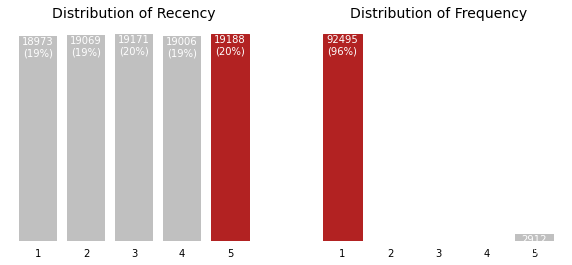

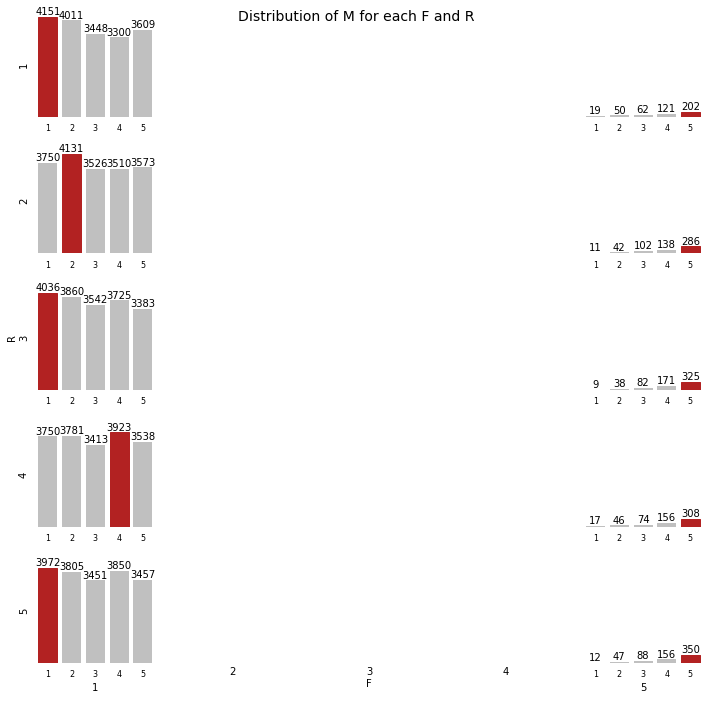

In [129]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

In [130]:
# Мы можем видеть, что если давность неравномерно распределенна, 
# почти все клиенты совершают покупки не очень часто (96% клиентов имеют частоту 1).

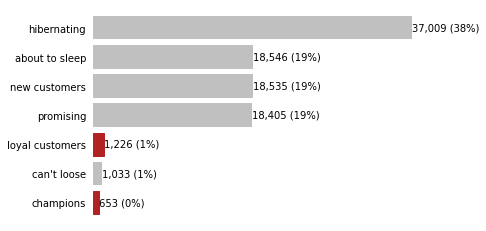

In [131]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [132]:
# У нас много клиентов, которые не часто покупают у нас (38% находятся в спящем режиме).
# Так же большую часть занимают клиенты из сегментов about to sleep, new customers, promising,
# и очень малая часть приходится на лояльных пользователей и чемпионов.
# Следовательно, нужно предпринять какие-нибудь действия, для того, чтобы наши клиенты перешли 
# в сегмент лояльных пользователей и чемпионов.